# Week 1: Q-Learning on FrozenLake

Welcome to Week 1! This week we’ll get hands-on with **Q-learning** using OpenAI Gym’s **FrozenLake-v1** environment. Your goal is to train a tabular Q-learning agent to navigate a slippery frozen lake without falling into holes.

Read about the FrozenLake environment from the openAI gymnasium website and try to solve this assignment

## Goals

- Understand and implement Q-learning with a Q-table.
- Use an ε-greedy exploration strategy.
- Visualize training progress with reward curves.
- Evaluate the learned policy.


## Environment Setup

In [1]:
# !pip install gym==0.26.2 matplotlib numpy

In [2]:
import gym
import numpy as np
import matplotlib.pyplot as plt

env = gym.make("FrozenLake-v1", is_slippery=True)
state_space_size = env.observation_space.n
action_space_size = env.action_space.n
Q = np.zeros((state_space_size, action_space_size))

In [3]:
if not hasattr(np, 'bool8'):
    np.bool8 = np.bool_

## Training Loop
Complete the training loop

In [4]:
def train_agent(episodes=2000, alpha=0.8, gamma=0.95, epsilon=1.0, decay=0.995):
    rewards = []
    np.random.seed(42)
    for ep in range(episodes):
        state = env.reset()[0]
        done = False
        total_reward = 0
        while not done:

            #TODO select action

            if np.random.rand() < epsilon:
                action = np.random.choice(action_space_size)
            else:
                action = np.random.choice(np.arange(action_space_size)[Q[state]==np.max(Q[state])])
              
            next_state, reward, done, _, _ = env.step(action)

            #TODO Update The Q values

            Q[state,action]+=alpha*(reward+gamma*np.max(Q[next_state])-Q[state][action])
            
            state = next_state
            total_reward += reward

        #TODO maybe try decaying epsilon between episodes
        
        epsilon*=decay
        
        rewards.append(total_reward)

          
    return rewards

## Plotting Results

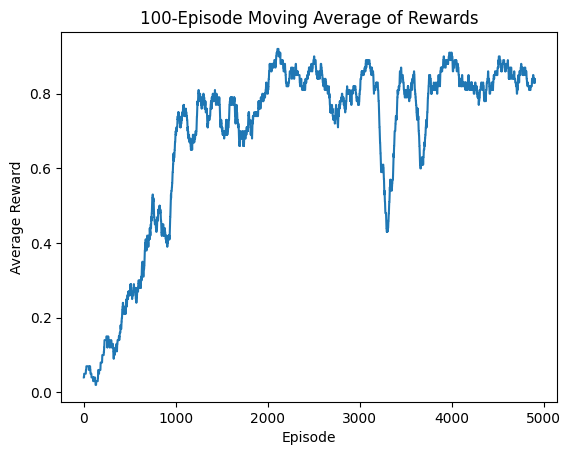

In [5]:
rewards = train_agent(episodes=5000)
plt.plot(np.convolve(rewards, np.ones(100)/100, mode='valid'))
plt.title("100-Episode Moving Average of Rewards")
plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.show()
env.close()

## Test the Learned Policy

In [6]:
def test_agent(Q, episodes=5,render=True):
    for ep in range(episodes):
        state = env.reset()[0]
        done = False
        print(f"Episode {ep + 1}")
        total_reward=0
        while not done:
            action = np.argmax(Q[state])
            next_state, reward, done, _, _ = env.step(action)
            if render :
                env.render()
            state = next_state
            total_reward+=reward
        print(total_reward)

In [7]:
#Visualizing Q table
print(Q)
Policy=np.zeros((4,4),dtype='S')
index_direction_mapping={0:"L",1:"D",2:"R",3:"U"}
for idx in np.arange(16):
    Policy[int(idx/4),idx%4]=index_direction_mapping[np.argmax(Q[idx])]

for idx1 in range(4):
    for idx2 in range(4):
        print(Policy[idx1][idx2],end="   ")
    print()

[[4.13588338e-03 1.54692324e-01 4.16166891e-03 4.09920851e-03]
 [8.34066821e-04 8.22420462e-04 5.44153938e-04 8.15442067e-02]
 [1.10180013e-03 2.09394962e-03 1.88339730e-03 2.67622474e-02]
 [4.29123928e-04 4.75127121e-04 1.60336538e-03 9.98396047e-03]
 [1.57332247e-01 2.21693542e-05 1.05196144e-03 3.34797111e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.28150136e-06 1.37167284e-05 3.23104999e-04 1.45333652e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.11468948e-03 4.37774603e-04 1.84371292e-03 4.63087525e-01]
 [1.02818063e-03 1.94238302e-01 8.53496096e-04 1.95597175e-03]
 [7.85220221e-01 2.71374187e-04 3.15159824e-04 2.50027437e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.56074263e-02 2.94241722e-03 5.84789699e-01 3.99558176e-03]
 [1.02632703e-01 9.99988760e-01 9.02106281e-02 1.03965707e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

In [8]:
env=gym.make("FrozenLake-v1",is_slippery=True)
test_agent(Q,render=False)
env.close()

Episode 1
1.0
Episode 2
1.0
Episode 3
1.0
Episode 4
1.0
Episode 5
1.0


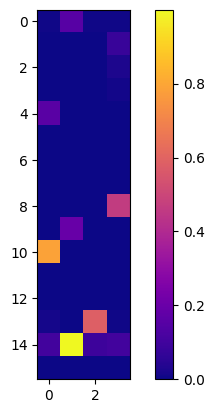

In [9]:
#Challenge 4
plt.imshow(Q,cmap="plasma")
plt.colorbar()
plt.show()

## Challenges

1. Set `is_slippery=False` and compare performance.
2. Change the reward for falling into holes.
3. Add a decaying learning rate `α = α0 / (1 + decay * t)`.
4. Visualize the Q-table as a heatmap (optional).
5. Maybe try to think about how to generalize this to solve a random lake without pretraining on the specific environment(Post your ideas on the whatsapp group and we will host a competition if people are interested)


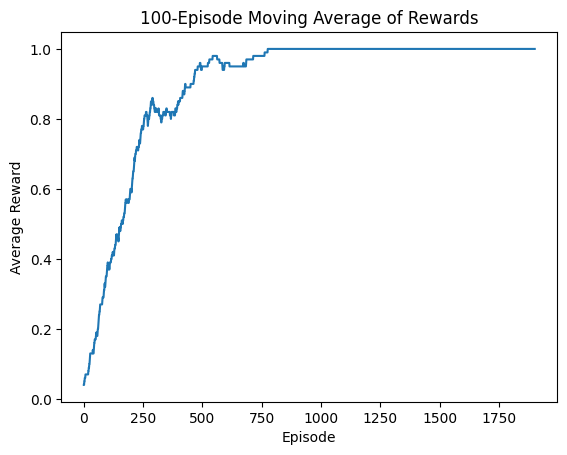

Episode 1
1.0
Episode 2
1.0
Episode 3
1.0
Episode 4
1.0
Episode 5
1.0


In [10]:
#Challenge 1
#In case of setting is_slippery=False the state at t+1 is precisely known given we know state and action at t and hence the policy 
# become precise i.e the policy always leads to the end of lake
env=gym.make("FrozenLake-v1",is_slippery=False)
state_space_size = env.observation_space.n
action_space_size = env.action_space.n
Q = np.zeros((state_space_size, action_space_size))
rewards = train_agent()
plt.plot(np.convolve(rewards, np.ones(100)/100, mode='valid'))
plt.title("100-Episode Moving Average of Rewards")
plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.show()
env=gym.make("FrozenLake-v1",is_slippery=False,render_mode="human")
test_agent(Q)
env.close()

0 -0.1
50 -0.1
100 -0.1
150 -0.1
200 -0.1
250 -0.1
300 -0.1
350 -0.1
400 -0.1
450 -0.1
500 -0.1
550 1.0
600 -0.1
650 1.0
700 -0.1
750 -0.1
800 -0.1
850 1.0
900 -0.1
950 -0.1
1000 -0.1
1050 1.0
1100 1.0
1150 1.0
1200 -0.1
1250 1.0
1300 -0.1
1350 -0.1
1400 1.0
1450 1.0
1500 1.0
1550 1.0
1600 1.0
1650 -0.1
1700 1.0
1750 1.0
1800 1.0
1850 1.0
1900 1.0
1950 1.0


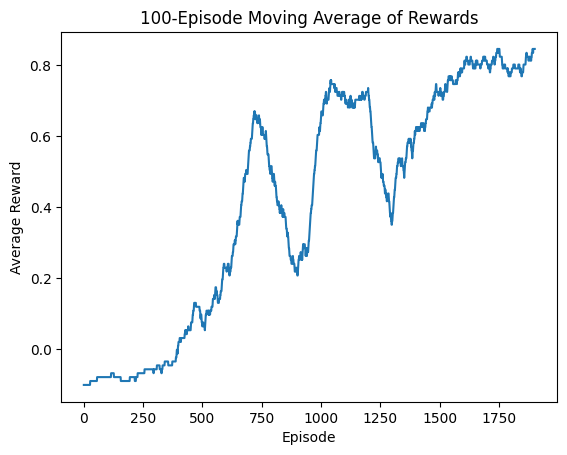

Episode 1
1.0
Episode 2
1.0
Episode 3
1.0
Episode 4
1.0
Episode 5
1.0
Episode 6
1.0
Episode 7
1.0
Episode 8
1.0
Episode 9
1.0
Episode 10
1.0
Episode 11
0.0
Episode 12
1.0


In [11]:
#Challenge 2
#
def train_agent(episodes=2000, alpha=0.8, gamma=0.95, epsilon=1.0, decay=0.995):
    rewards = []
    np.random.seed(42)
    for ep in range(episodes):
        state = env.reset()[0]
        done = False
        total_reward = 0
        while not done:

            #TODO select action

            if np.random.rand() < epsilon:
                action = np.random.choice(action_space_size)
            else:
                action = np.random.choice(np.arange(action_space_size)[Q[state]==np.max(Q[state])])

            next_state, reward, done, _, _ = env.step(action)

            #TODO Update The Q values

            Q[state,action]+=alpha*(reward+gamma*np.max(Q[next_state])-Q[state][action])
            
            if done and next_state!=15:
                reward-=0.1
            state = next_state
            total_reward += reward

        #TODO maybe try decaying epsilon between episodes
        
        epsilon*=decay
        
        rewards.append(total_reward)

        if ep%50==0:
          print(ep,reward)
          
    return rewards
env=gym.make("FrozenLake-v1",is_slippery=True)
state_space_size = env.observation_space.n
action_space_size = env.action_space.n
Q = np.zeros((state_space_size, action_space_size))
rewards = train_agent()
plt.plot(np.convolve(rewards, np.ones(100)/100, mode='valid'))
plt.title("100-Episode Moving Average of Rewards")
plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.show()
env=gym.make("FrozenLake-v1",is_slippery=True)
test_agent(Q,episodes=12,render=False)
env.close()

In [12]:
#As shown in the plot above , since a negative reward is given when the agent falls into a hole , the environment being stochastic
# leaded to a decrease in average of total reward per episode because in few of the episodes the termination might happen because of the agent falling into
# holes leading to negative reward

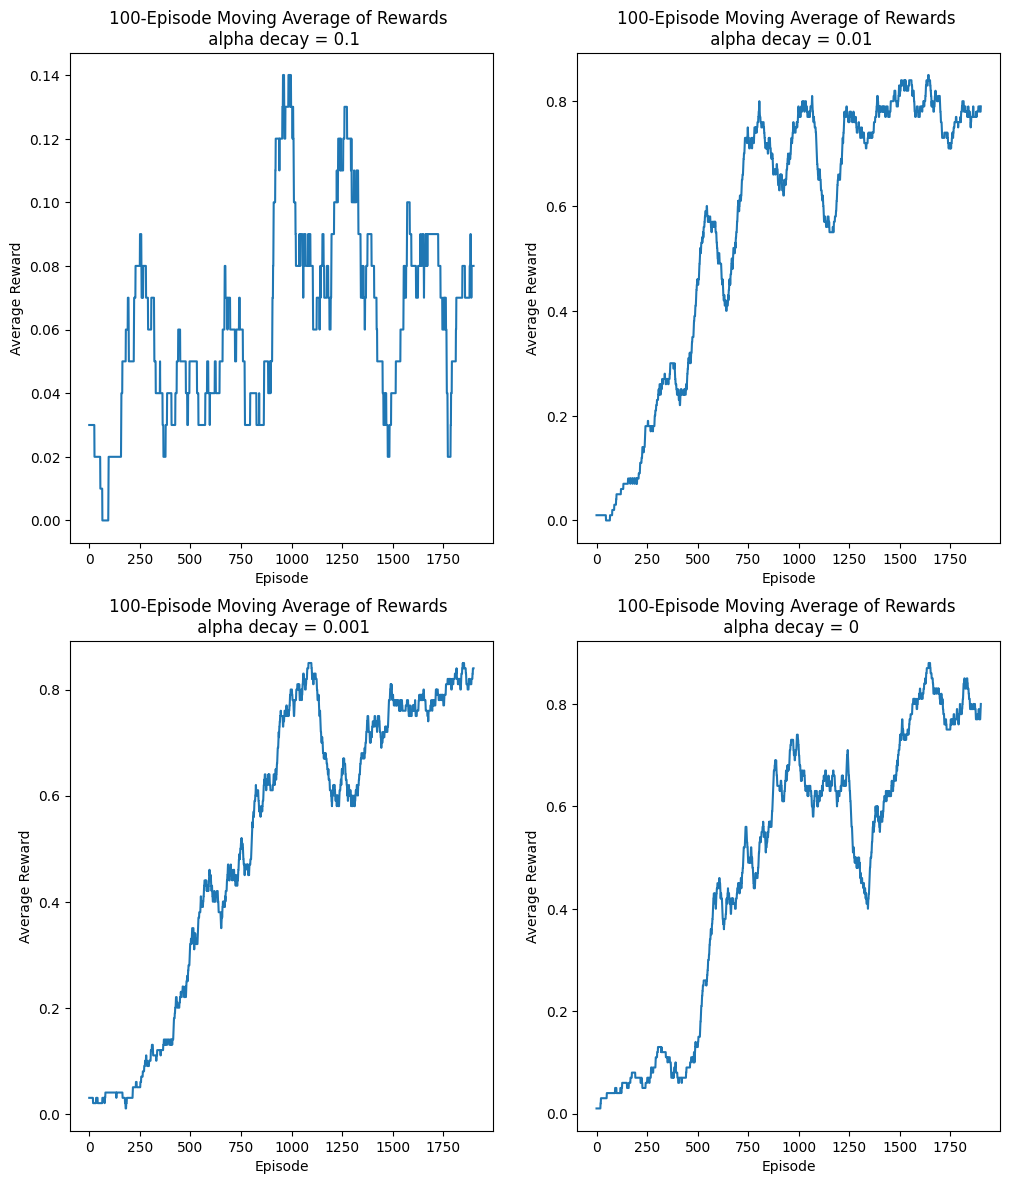

Episode 1
0.0
Episode 2
1.0
Episode 3
0.0
Episode 4
1.0
Episode 5
0.0
Episode 6
0.0
Episode 7
1.0
Episode 8
1.0
Episode 9
1.0
Episode 10
1.0
Episode 11
0.0
Episode 12
0.0


In [13]:
#Challenge 3
#A decrease in learning rate as the number of episodes encountered increases leads to better and sharper convergence however it shdnt decay 
# fast so that the rate of convergence doesn't decrease much
def train_agent(episodes=2000, alpha=0.8, gamma=0.95, epsilon=1.0, decay=0.995,alpha_decay=0.0005):
    rewards = []
    np.random.seed(42)
    for ep in range(episodes):
        state = env.reset()[0]
        done = False
        total_reward = 0
        while not done:

            #TODO select action

            if np.random.rand() < epsilon:
                action = np.random.choice(action_space_size)
            else:
                action = np.random.choice(np.arange(action_space_size)[Q[state]==np.max(Q[state])])
              
            next_state, reward, done, _, _ = env.step(action)

            #TODO Update The Q values

            Q[state,action]+=alpha*(reward+gamma*np.max(Q[next_state])-Q[state][action])/(1+alpha_decay*(ep))
            
            state = next_state
            total_reward += reward

        #TODO maybe try decaying epsilon between episodes
        
        epsilon*=decay
        
        rewards.append(total_reward)
        
    return rewards
env=gym.make("FrozenLake-v1",is_slippery=True)
state_space_size = env.observation_space.n
action_space_size = env.action_space.n
Q = np.zeros((state_space_size, action_space_size))
plt.figure(figsize=(12,14))
for idx in range(4):
  plt.subplot(2,2,idx+1)
  alpha_decay=pow(10,-idx-1)
  if idx==3:
    alpha_decay=0
  Q = np.zeros((state_space_size, action_space_size))
  rewards = train_agent(alpha_decay=alpha_decay)
  plt.plot(np.convolve(rewards, np.ones(100)/100, mode='valid'))
  plt.title(f"100-Episode Moving Average of Rewards \n alpha decay = {alpha_decay}")
  plt.xlabel("Episode")
  plt.ylabel("Average Reward")
plt.show()
env=gym.make("FrozenLake-v1",is_slippery=True)
test_agent(Q,episodes=12,render=False)
env.close()

In [14]:
#Due to a small optimal policy a high learning rate intial and later on with a smaller learning rate will make the convergence faster and precise (prevents oscillation abt optimal policy)
#for a very large alpha decay - 0.1 the convergence is very slow and hence the learning process is not very efficient
#for a very low alpha decay -0.001 and 0 the convergence is acheived but the variance of rewards is high because of oscillation due to large alpha

In [15]:
#Challenge 5
#For a generalised lake we need to have imformation regarding the position of holes
#We can calculate a optimal q policy for many random frozen lakes
#And then we can try to create a map from the hole positions on lake to action values at states
#This map might be done by using neural networks
#We can maybe create a cnn where the 2d array of hole position is converted to filters in a cnn and each filter,these filters can maybe then be mapped to q values through a linear neural network


In [16]:
#Testing Epsilon decay Convergence Speeds

500 6


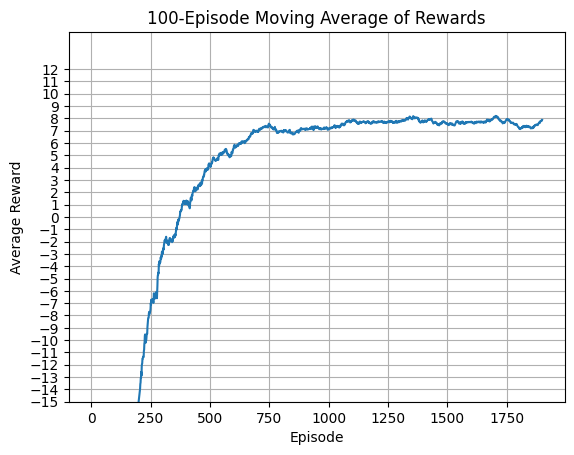

In [17]:
#Taxi-v3 environment
def train_agent(episodes=2000, alpha=0.8, gamma=0.95, epsilon=1.0, decay=0.995):
    rewards = []
    np.random.seed(42)
    for ep in range(episodes):
        state = env.reset()[0]
        done = False
        total_reward = 0
        while not done:

            #TODO select action

            if np.random.rand() < epsilon:
                action = np.random.choice(action_space_size)
            else:
                action = np.random.choice(np.arange(action_space_size)[Q[state]==np.max(Q[state])])
              
            next_state, reward, done, _, _ = env.step(action)

            #TODO Update The Q values

            Q[state,action]+=alpha*(reward+gamma*np.max(Q[next_state])-Q[state][action])
            
            state = next_state
            total_reward += reward

        #TODO maybe try decaying epsilon between episodes
        
        epsilon*=decay
        
        rewards.append(total_reward)

          
    return rewards

env=gym.make("Taxi-v3")
state_space_size = env.observation_space.n
action_space_size = env.action_space.n
print(state_space_size,action_space_size)
Q = np.zeros((state_space_size, action_space_size))
rewards = train_agent()
plt.plot(np.convolve(rewards, np.ones(100)/100, mode='valid'))
plt.title("100-Episode Moving Average of Rewards")
plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.ylim((-15,15))
plt.grid(True)
plt.yticks(np.arange(-15,13,1))
plt.show()


In [18]:
env=gym.make("Taxi-v3",render_mode="human")
test_agent(Q)
env.close()

Episode 1
8
Episode 2
13
Episode 3
10
Episode 4
4
Episode 5
6


In [19]:
#Comparing Different Epsilon Decays Functions
def train_agent(episodes=2000, alpha=0.8, gamma=0.95, epsilon=1.0, decay=0.995,decay_type=None):
    rewards = []
    np.random.seed(42)
    epsilon_values=[]
    Q = np.zeros((state_space_size, action_space_size))
    for ep in range(episodes):
        state = env.reset()[0]
        done = False
        total_reward = 0
        while not done:

            #TODO select action

            if np.random.rand() < epsilon:
                action = np.random.choice(action_space_size)
            else:
                action = np.random.choice(np.arange(action_space_size)[Q[state]==np.max(Q[state])])
              
            next_state, reward, done, _, _ = env.step(action)

            #TODO Update The Q values

            Q[state,action]+=alpha*(reward+gamma*np.max(Q[next_state])-Q[state][action])
            
            state = next_state
            total_reward += reward

        #TODO maybe try decaying epsilon between episodes
        if decay_type == "exponential":
            epsilon*=decay
        if decay_type == "Linear":
            epsilon-=decay
        if decay_type == "Inverse":
            epsilon = epsilon*(1+decay*(ep))/(1+decay*(ep+1))
        if decay_type == "Linear_Fast":
            if epsilon>0:
                epsilon-=decay
        epsilon_values.append(epsilon)
        rewards.append(total_reward)

          
    return rewards,epsilon_values

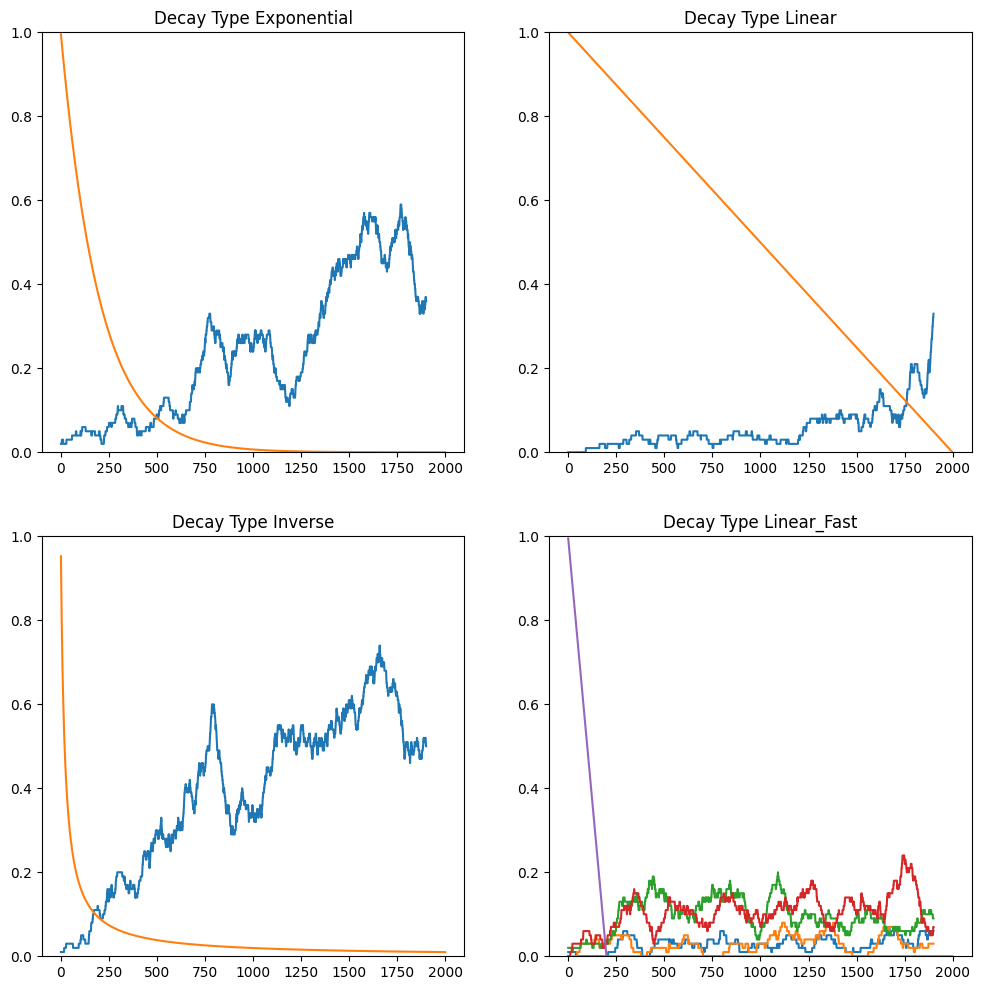

In [20]:
env=gym.make("FrozenLake-v1",is_slippery=True)
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
env = gym.make("FrozenLake-v1", is_slippery=True)
state_space_size = env.observation_space.n
action_space_size = env.action_space.n
Q = np.zeros((state_space_size, action_space_size))
rewards,epsilon_values=train_agent(decay=0.995,decay_type="exponential")
plt.plot(np.convolve(rewards,np.ones(100)*0.01,mode="valid"))
plt.plot(epsilon_values)
plt.title("Decay Type Exponential")
plt.ylim((0,1))
plt.subplot(2,2,2)
Q = np.zeros((state_space_size, action_space_size))
rewards,epsilon_values=train_agent(decay=0.0005,decay_type="Linear")
plt.plot(np.convolve(rewards,np.ones(100)*0.01,mode="valid"))
plt.plot(epsilon_values)
plt.title("Decay Type Linear")
plt.ylim((0,1))
plt.subplot(2,2,3)
Q = np.zeros((state_space_size, action_space_size))
rewards,epsilon_values=train_agent(decay=0.05,decay_type="Inverse")
plt.plot(np.convolve(rewards,np.ones(100)*0.01,mode="valid"))
plt.plot(epsilon_values)
plt.title("Decay Type Inverse")
plt.ylim((0,1))
plt.subplot(2,2,4)
Q = np.zeros((state_space_size, action_space_size))
rewards,epsilon_values=train_agent(decay=0.005,decay_type="Linear_Fast")
plt.plot(np.convolve(rewards,np.ones(100)*0.01,mode="valid"))
Q = np.zeros((state_space_size, action_space_size))
rewards,epsilon_values=train_agent(decay=0.005,decay_type="Linear_Fast")
plt.plot(np.convolve(rewards,np.ones(100)*0.01,mode="valid"))
Q = np.zeros((state_space_size, action_space_size))
rewards,epsilon_values=train_agent(decay=0.005,decay_type="Linear_Fast")
plt.plot(np.convolve(rewards,np.ones(100)*0.01,mode="valid"))
Q = np.zeros((state_space_size, action_space_size))
rewards,epsilon_values=train_agent(decay=0.005,decay_type="Linear_Fast")
plt.plot(np.convolve(rewards,np.ones(100)*0.01,mode="valid"))
plt.plot(epsilon_values)
plt.title("Decay Type Linear_Fast")
plt.ylim((0,1))
plt.show()


In [21]:
#In Linear Decay as seen due to lower exploitation the avergae reward is not optimal
#In Inverse Decay Due to lower explorartion there average reward is not optimal
#In Linear Fast decay where there is exploration only in first few episodes ,the optimal reward is strongly dependent on the random explorations done in the beginning
#In exponential Decay there is a balance between exploration and exploitation , with the exploration continuing until the very end

## TLDR

Learn how to implement tabular Q-learning to solve a simple environment. Use exploration, value updates, and reward tracking to build intuition before moving to deep RL.

